# Standalone Usage

To use the `ImageGenerator` standalone simply initialize it and start obtaining images


In [1]:
# not required for the package, but useful for looking at images
import matplotlib.pyplot as plt

from mda_simulator import ImageGenerator

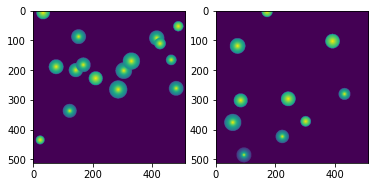

In [2]:
gen = ImageGenerator(N=5000)

img1 = gen.snap_img(xy=(0, 0), c=1, z=5, exposure=5)

# a different set of "cells"
img2 = gen.snap_img(xy=(512, 0), c=1, z=5, exposure=5)

fig, axs = plt.subplots(1, 2)
axs[0].imshow(img1)
axs[1].imshow(img2)

### Moving simulation forward in time

Repeatedly calling snap_image will return identical results for the same position until
you step the simulations time forward. When you do this the positions of each cells are updated by taking a random walk in XY with the steps drawn from $ \mathcal{N}((0,0),\sigma^{2})\, $ where $\sigma = $ `step_scale * delta_t`. `delta_t` is an argument to `increment_time` with a default of 1, and `step_scale` is a 2-tuple of numbers defined at object creation with a default of `(2.5, 2.5)`

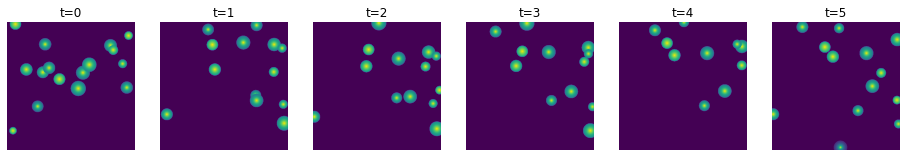

In [17]:
T = 5
later_times = []
fig, axs = plt.subplots(1, T + 1, figsize=(16, 8))
axs[0].imshow(img1)
axs[0].axis("off")
axs[0].set_title("t=0")
for t in range(T):
    gen.increment_time(delta_t=10)
    later_times.append(gen.snap_img(xy=(0, 0), c=1, z=5, exposure=5))
    axs[t + 1].imshow(later_times[-1])
    axs[t + 1].axis("off")
    axs[t + 1].set_title(f"t={t+1}")